In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks
from skimage import io, transform
from sklearn.metrics import confusion_matrix
import seaborn as sns

path       = "data"
size_image = (32, 32)

C:\Users\antoi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
classified_names = ["glass", "paper", "cardboard", "plastic", "metal", "trash"]
def preprocessing_data(path_data):
    X = []
    Y = []
    for file_name in os.listdir(path_data):
        img_path = os.path.join(path_data, file_name)
        
        if os.path.isfile(img_path) and file_name.lower().endswith(('.png','.jpg','.jpeg')):
            image           = cv2.imread(img_path)
            gray_image      = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            resized_image   = transform.resize(gray_image, size_image, anti_aliasing=True)
            corner_image    = corner_harris(resized_image)
            flattened_image = corner_image.flatten()
            X.append(flattened_image)
            img_name        = img_path.rsplit('\\', 1)
            img_name        = img_name[1].split('.')[0]
            img_name        = ''.join(filter(str.isalpha, img_name))
            Y.append(img_name)
            
    return X, Y

X, Y = preprocessing_data(path)

In [7]:
list(set(Y))

['metal', 'cardboard', 'trash', 'glass', 'paper', 'plastic']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 128)

In [9]:
import pandas as pd

df = pd.DataFrame({'X': X_train, 'Y': Y_train})
df.to_csv('data.csv', index=False)

In [10]:
df = pd.DataFrame({'X': X_test, 'Y': Y_test})

df.to_csv('data_test.csv', index=False)

In [11]:
X_train

[array([1.77809444, 1.88064094, 0.15145959, ..., 0.32535903, 3.57336559,
        3.36270221]),
 array([3.39490152, 4.31563692, 0.99824803, ..., 0.7867872 , 4.01032444,
        3.67075469]),
 array([1.39871314, 1.49228844, 0.11091153, ..., 0.06636634, 0.98693878,
        0.92100194]),
 array([2.59831446, 2.78338695, 0.19799514, ..., 0.20241022, 2.87198881,
        2.68751183]),
 array([3.79145883, 4.04129545, 0.30041848, ..., 0.07202859, 0.95565685,
        0.88163812]),
 array([3.85089382, 4.06346387, 0.31804907, ..., 0.12588334, 1.63567281,
        1.52781498]),
 array([3.80670704, 4.04663601, 0.3214619 , ..., 0.02845903, 0.17359126,
        0.1608431 ]),
 array([4.00897943, 4.26096004, 0.33443765, ..., 0.0048305 , 0.0071083 ,
        0.00470893]),
 array([3.6048113 , 3.83202503, 0.31899896, ..., 0.14607843, 1.96991342,
        1.86327522]),
 array([2.50210201, 2.66584898, 0.20430783, ..., 0.06348864, 0.84857057,
        0.79914997]),
 array([3.50516277, 3.71380789, 0.35842528, ..., 0

In [12]:
model = RandomForestClassifier(n_estimators=200, max_depth=50, random_state = 128)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, random_state=128)

In [13]:
Y_pred = model.predict(X_test)

In [14]:
list(set(Y_pred))

['metal', 'cardboard', 'trash', 'glass', 'paper', 'plastic']

In [15]:
X_true_test, Y_true_test = preprocessing_data("data_test")

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pickle

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


<Axes: >

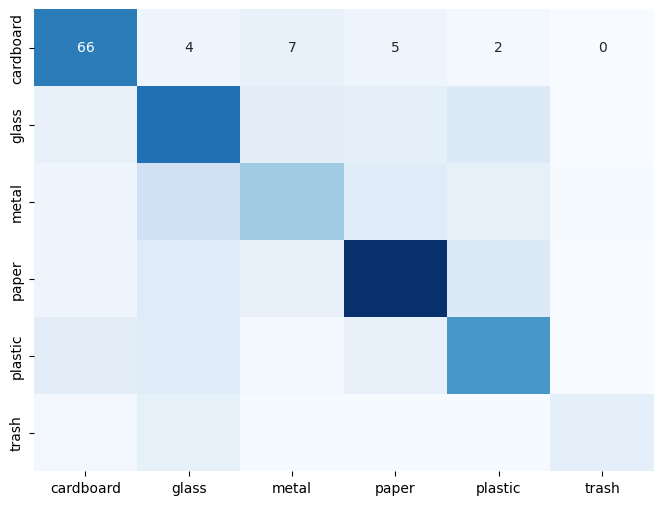

In [17]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)

In [18]:
Y_true_test

['cardboard', 'metal', 'plastic']

In [19]:
Y_pred_test = model.predict(X_true_test)
Y_pred_test

array(['metal', 'cardboard', 'cardboard'], dtype='<U9')

In [20]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
print(accuracy)
print(report)

0.6240157480314961
              precision    recall  f1-score   support

   cardboard       0.73      0.77      0.75        84
       glass       0.51      0.56      0.54       109
       metal       0.51      0.48      0.49        77
       paper       0.73      0.72      0.73       129
     plastic       0.57      0.60      0.59        86
       trash       1.00      0.39      0.56        23

    accuracy                           0.62       508
   macro avg       0.68      0.59      0.61       508
weighted avg       0.64      0.62      0.62       508



<Axes: >

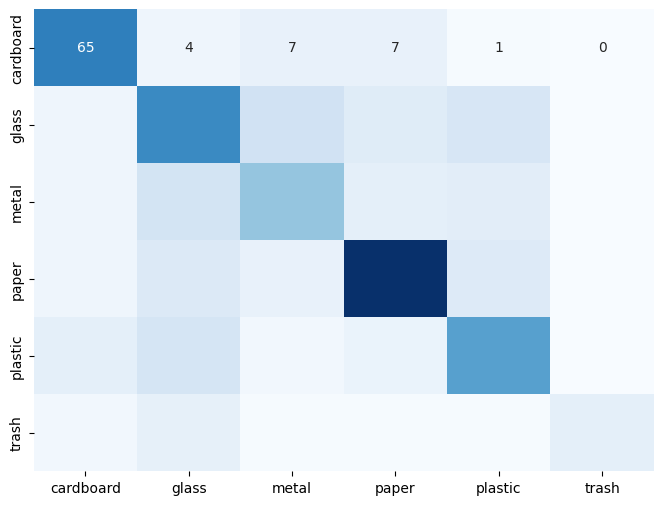

In [22]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)

In [23]:
weak_model = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier(estimator=weak_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [24]:
predictions = adaboost_model.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)
print(accuracy)
print(report)

0.4744094488188976
              precision    recall  f1-score   support

   cardboard       0.52      0.56      0.54        84
       glass       0.44      0.50      0.47       109
       metal       0.32      0.36      0.34        77
       paper       0.71      0.54      0.61       129
     plastic       0.39      0.37      0.38        86
       trash       0.40      0.43      0.42        23

    accuracy                           0.47       508
   macro avg       0.46      0.46      0.46       508
weighted avg       0.49      0.47      0.48       508



<Axes: >

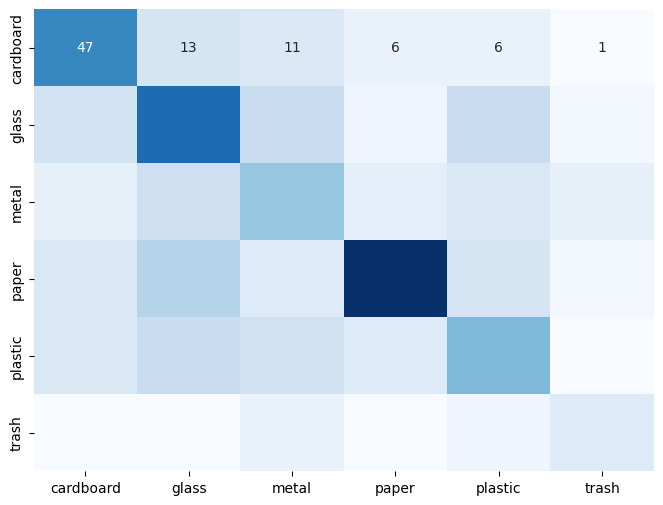

In [25]:
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)

In [26]:
model = LinearSVC()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)
print(accuracy)
print(report)

C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.38976377952755903
              precision    recall  f1-score   support

   cardboard       0.35      0.36      0.36        84
       glass       0.41      0.39      0.40       109
       metal       0.37      0.25      0.29        77
       paper       0.50      0.50      0.50       129
     plastic       0.30      0.42      0.35        86
       trash       0.33      0.30      0.32        23

    accuracy                           0.39       508
   macro avg       0.38      0.37      0.37       508
weighted avg       0.39      0.39      0.39       508



C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)
print(accuracy)
print(report)

0.5177165354330708
              precision    recall  f1-score   support

   cardboard       0.48      0.60      0.53        84
       glass       0.45      0.51      0.48       109
       metal       0.44      0.27      0.34        77
       paper       0.77      0.58      0.66       129
     plastic       0.45      0.62      0.52        86
       trash       0.47      0.35      0.40        23

    accuracy                           0.52       508
   macro avg       0.51      0.49      0.49       508
weighted avg       0.54      0.52      0.52       508



In [28]:
svc_classifier_1 = SVC(kernel='linear', C=1.0)
svc_classifier_2 = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_classifier_3 = SVC(kernel='poly', degree=3, C=1.0)

ensemble_classifier = VotingClassifier(estimators=[
    ('linear', svc_classifier_1),
    ('rbf', svc_classifier_2),
    ('poly', svc_classifier_3)
], voting='hard') 

ensemble_classifier.fit(X_train, Y_train)
predictions = ensemble_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
report = classification_report(Y_test, predictions)
print(accuracy)
print(report)

0.4389763779527559
              precision    recall  f1-score   support

   cardboard       0.50      0.50      0.50        84
       glass       0.43      0.40      0.42       109
       metal       0.50      0.19      0.28        77
       paper       0.64      0.47      0.54       129
     plastic       0.31      0.71      0.43        86
       trash       0.00      0.00      0.00        23

    accuracy                           0.44       508
   macro avg       0.40      0.38      0.36       508
weighted avg       0.47      0.44      0.43       508



C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
!pip freeze > requirements.txt

In [ ]:
for file_name in os.listdir(path_data):
        img_path = os.path.join(path_data, file_name)
        
        if os.path.isfile(img_path) and file_name.lower().endswith(('.png','.jpg','.jpeg')):
            image           = cv2.imread(img_path)
            print(processor(image, return_tensors='pt'))

In [ ]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

In [155]:
path_data = "TrashBox_train_dataset_subfolders"
classified_names = ["cardboard", "plastic", "metal"]

X = []
Y = []
for file in os.listdir(path_data):
    if file == "cardboard":
        file_path = path_data + "/" + file
        for file_name in os.listdir(file_path):
            img_path = file_path + "/" + file_name
            image           = cv2.imread(img_path)
            if image is not None:
                gray_image      = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                resized_image   = transform.resize(gray_image, size_image, anti_aliasing=True)
                corner_image    = corner_harris(resized_image)
                flattened_image = corner_image.flatten()
                X.append(flattened_image)
                Y.append("cardboard")
    

[array([0.59181925, 0.63084809, 0.05201285, ..., 0.00508877, 0.07676078,
        0.06931848]),
 array([1.05274629, 1.2904089 , 0.09755454, ..., 0.37904922, 5.39152965,
        5.10013451]),
 array([3.41751724, 3.63774555, 0.25966809, ..., 0.4952272 , 7.15773052,
        6.89516204]),
 array([0.12873599, 0.14238476, 0.01133805, ..., 0.17127059, 0.63552809,
        0.59480366]),
 array([1.06981867, 1.07887492, 0.06317522, ..., 0.01334312, 0.20484661,
        0.19744792]),
 array([6.92999351, 7.37185334, 0.55981899, ..., 0.49156659, 6.81053876,
        6.54794591]),
 array([6.92999351, 7.37185334, 0.55981899, ..., 0.35048536, 3.6946301 ,
        3.68917146]),
 array([6.92999351, 7.37185334, 0.55981899, ..., 0.59565425, 4.86800972,
        4.75618646]),
 array([2.45682878, 2.62721713, 0.17868518, ..., 0.10653595, 1.12156638,
        1.07778892]),
 array([ 4.25187929,  4.51752929,  0.32938348, ..., -0.02382122,
         0.00910574,  0.01757855]),
 array([3.80552596, 4.05031792, 0.28951568, 

In [162]:
X2 = []
Y2 = []
for file in os.listdir(path_data):
    if file == "metal":
        file_path = path_data + "/" + file
        for file2 in os.listdir(file_path):
            file2_path = file_path + "/" + file2
            for file_name in os.listdir(file2_path):
                img_path = file2_path + "/" + file_name
                if os.path.isfile(img_path) and file_name.lower().endswith(('.png','.jpg','.jpeg')):
                    image           = cv2.imread(img_path)
                    if image is not None : 
                        gray_image      = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        resized_image   = transform.resize(gray_image, size_image, anti_aliasing=True)
                        corner_image    = corner_harris(resized_image)
                        flattened_image = corner_image.flatten()
                        X2.append(flattened_image)
                        Y2.append("metal")
    

In [158]:
X2

[]

In [163]:
X3 = []
Y3 = []
for file in os.listdir(path_data):
    if file == "plastic":
        file_path = path_data + "/" + file
        for file2 in os.listdir(file_path):
            file2_path = file_path + "/" + file2
            for file_name in os.listdir(file2_path):
                img_path = file2_path + "/" + file_name
                if os.path.isfile(img_path) and file_name.lower().endswith(('.png','.jpg','.jpeg')):
                    image           = cv2.imread(img_path)
                    if image is not None:
                        gray_image      = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                        resized_image   = transform.resize(gray_image, size_image, anti_aliasing=True)
                        corner_image    = corner_harris(resized_image)
                        flattened_image = corner_image.flatten()
                        X3.append(flattened_image)
                        Y3.append("plastic")


In [164]:
X_data = X + X2 + X3
Y_data = Y + Y2 + Y3

In [168]:
from collections import Counter

In [169]:
Counter(Y_data)

Counter({'cardboard': 1929, 'metal': 2066, 'plastic': 2133})

In [170]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 128)

In [173]:
rd_forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
rd_forest_model.fit(X_train2, Y_train2)

with open('random_forest_model_advanced.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('random_forest_model_advanced.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [175]:
Y_pred2 = model.predict(X_val2)
accuracy = accuracy_score(Y_val2, Y_pred2)
report = classification_report(Y_val2, Y_pred2)
print("Précision : ", accuracy)
print("Rapport de classification : ", report)

Précision : 0.2463295269168026
Rapport de classification :
               precision    recall  f1-score   support

   cardboard       0.36      0.43      0.39       395
       glass       0.00      0.00      0.00         0
       metal       0.43      0.28      0.34       416
       paper       0.00      0.00      0.00         0
     plastic       0.49      0.04      0.08       415

    accuracy                           0.25      1226
   macro avg       0.26      0.15      0.16      1226
weighted avg       0.43      0.25      0.27      1226



C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
weak_model = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier(estimator=weak_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train2, Y_train2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [177]:
predictions = adaboost_model.predict(X_val2)

accuracy = accuracy_score(Y_val2, predictions)
report = classification_report(Y_val2, predictions)
print("Précision : ", accuracy)
print("Rapport de classification : ", report)

Précision : 0.4763458401305057
Rapport de classification :
               precision    recall  f1-score   support

   cardboard       0.49      0.48      0.48       395
       metal       0.49      0.47      0.48       416
     plastic       0.46      0.49      0.47       415

    accuracy                           0.48      1226
   macro avg       0.48      0.48      0.48      1226
weighted avg       0.48      0.48      0.48      1226



In [178]:
model = LinearSVC()
model.fit(X_train2, Y_train2)
predictions = model.predict(X_val2)

accuracy = accuracy_score(Y_val2, predictions)
report = classification_report(Y_val2, predictions)
print("Précision : ", accuracy)
print("Rapport de classification : ", report)

C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Précision : 0.4543230016313214
Rapport de classification :
               precision    recall  f1-score   support

   cardboard       0.47      0.48      0.48       395
       metal       0.45      0.44      0.44       416
     plastic       0.44      0.45      0.44       415

    accuracy                           0.45      1226
   macro avg       0.45      0.45      0.45      1226
weighted avg       0.45      0.45      0.45      1226



C:\Users\antoi\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
